# Handling Missing Values
In this notebook, we will explore various methods for handling missing values in data. Missing values are common in datasets and can negatively impact data analysis and model performance.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno

# Load a sample dataset with missing values
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Checking for Missing Values
Let's explore the missing values in the dataset and visualize their distribution.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


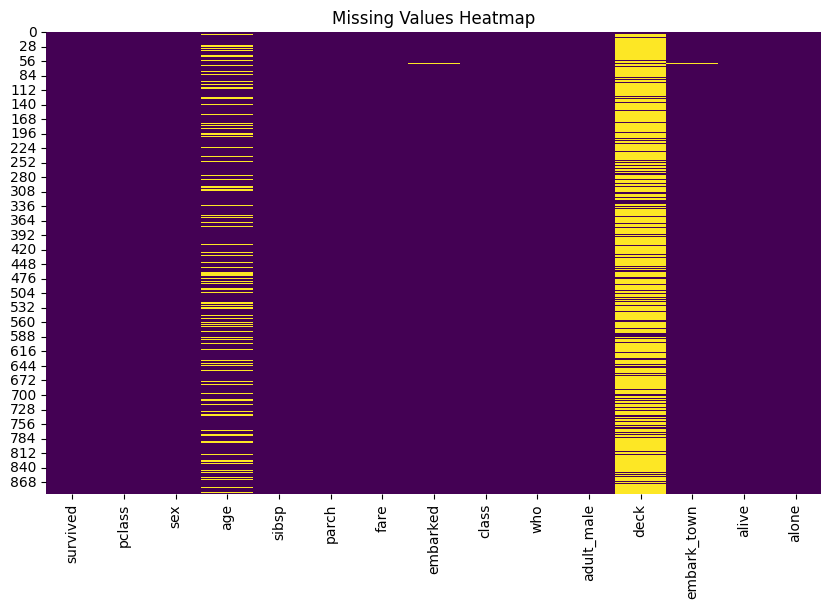

<Axes: >

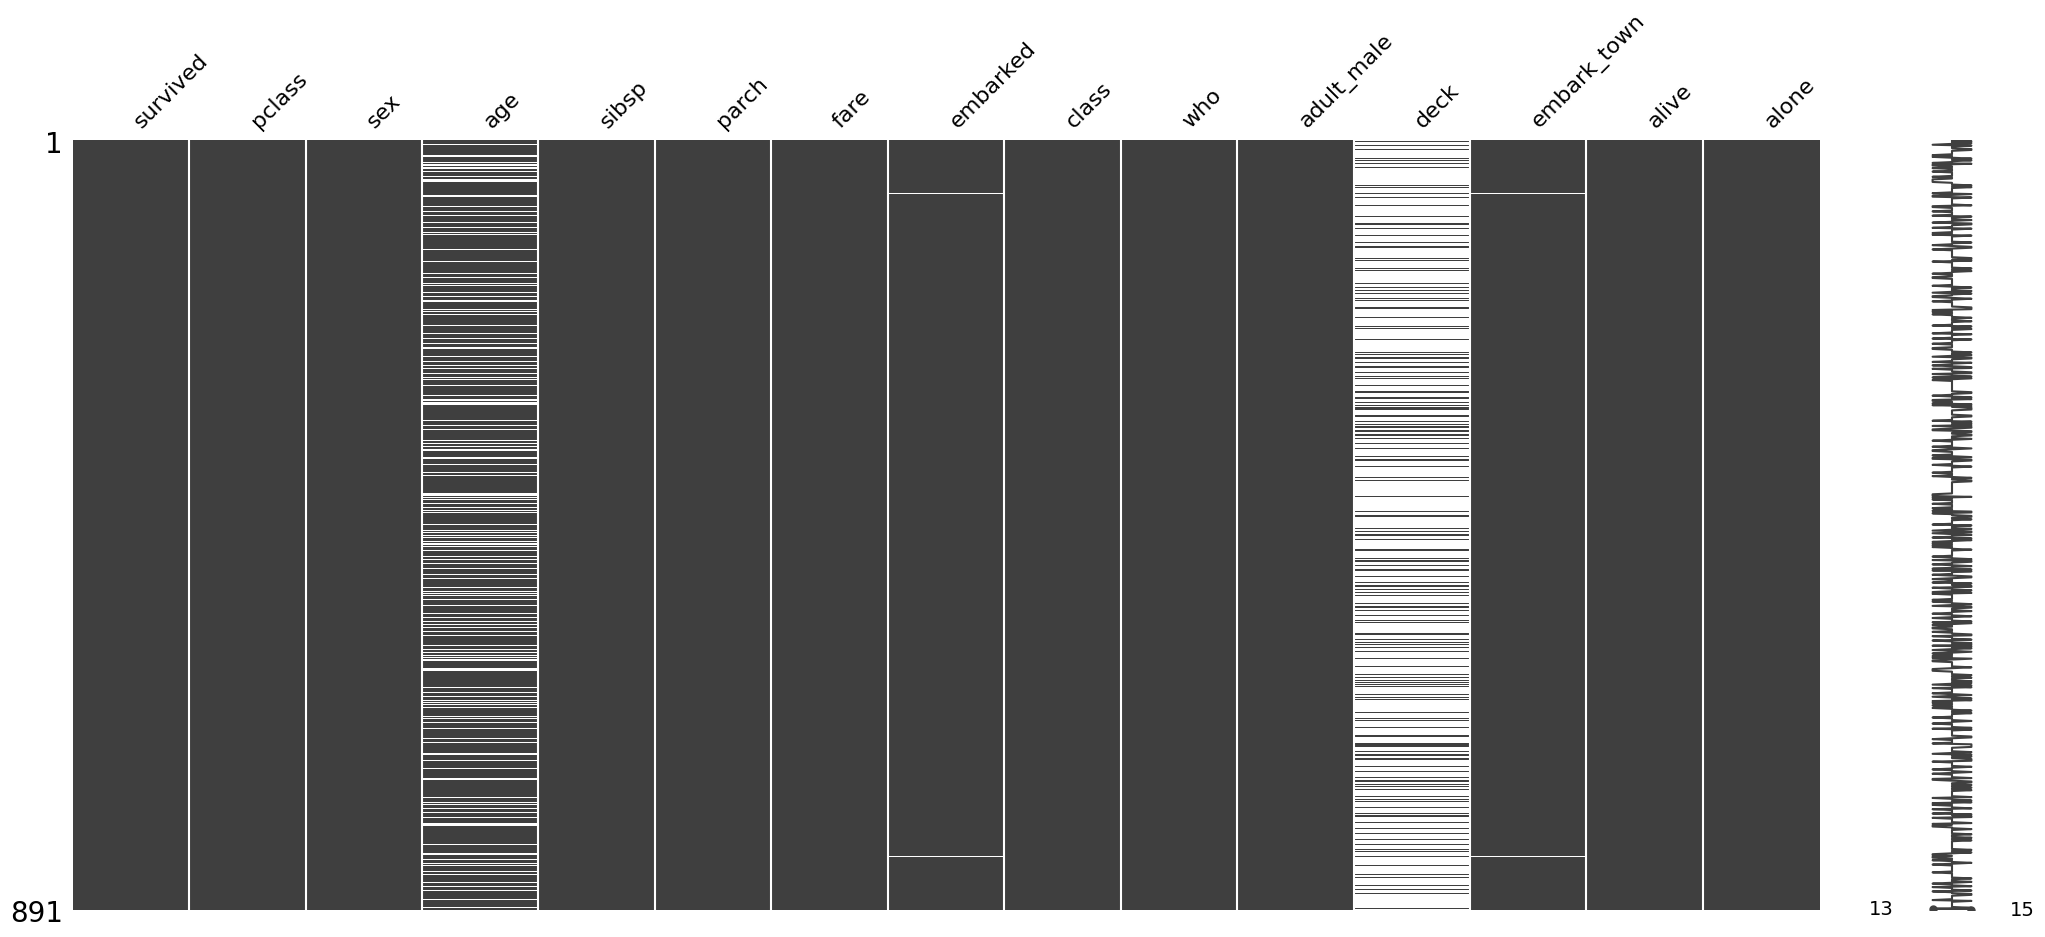

In [2]:
# Check for missing values
df.info()

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Visualize missing values using missingno
msno.matrix(df)

## Methods of Handling Missing Values
There are several techniques to handle missing values, depending on the context and data type.

### Dropping Missing Values
Dropping rows or columns with missing values is a straightforward method but can lead to data loss.

In [3]:
# Drop rows with missing values
df_dropped_rows = df.dropna()
print(f'Number of rows after dropping rows with missing values: {len(df_dropped_rows)}')

# Drop columns with missing values
df_dropped_columns = df.dropna(axis=1)
print(f'Number of columns after dropping columns with missing values: {len(df_dropped_columns.columns)}')

Number of rows after dropping rows with missing values: 182
Number of columns after dropping columns with missing values: 11


### Imputation Techniques
Imputation is the process of filling in missing values with statistical measures or predictions.

In [4]:
# Mean/Median/Mode Imputation
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Applying mean imputation on numerical columns
df_mean_imputed = df.copy()
df_mean_imputed['age'] = mean_imputer.fit_transform(df[['age']])
df_mean_imputed.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Forward and Backward Filling
df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')
df_ffill.head()

<ipython-input-5-f1ec9b85be88>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
<ipython-input-5-f1ec9b85be88>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [6]:
# Interpolation
df_interpolated = df.copy()
df_interpolated['age'] = df_interpolated['age'].interpolate()
df_interpolated.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# K-Nearest Neighbors (KNN) Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=[np.number])),
                              columns=df.select_dtypes(include=[np.number]).columns)
df_knn_imputed.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


In [8]:
# Iterative Imputer (MICE)
iterative_imputer = IterativeImputer()
df_mice_imputed = pd.DataFrame(iterative_imputer.fit_transform(df.select_dtypes(include=[np.number])),
                                columns=df.select_dtypes(include=[np.number]).columns)
df_mice_imputed.head()

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500


### Handling Categorical Variables
For categorical variables, it may be beneficial to fill missing values with a placeholder like 'Unknown'.

In [9]:
# Fill missing values in categorical columns with 'Unknown'
df_filled_categorical = df.copy()
df_filled_categorical['embarked'] = df_filled_categorical['embarked'].fillna('Unknown')
df_filled_categorical.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Conclusion
In this notebook, we explored different methods for handling missing values, including dropping data, imputation using statistical measures, KNN, MICE, and handling categorical variables. Choosing the right technique depends on the data and the problem context.